Uber and Lyft are publically traded comapnies, they are what is called a market place. Neither Uber nor Lyft owns the assets that complete the rides. Its interesting to see how they compare agianst each other. To do that the libarary "yfinance" will be used to access the finacial statements of the companies and also their historical share price, which will be the center of comparision.

In [50]:
import numpy as np
import yfinance as yf
import pandas as pd

In [51]:
ticker = 'UBER' #ticker name must be accurate
uber = yf.Ticker(ticker)

In [52]:
uber.financials.T

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation And Amortization In Income Statement,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2024-12-31,253050000.0,0.210,4.180000e+09,1.205000e+09,1.205000e+09,9.856000e+09,737000000.0,2.662500e+10,5.385000e+09,4.648000e+09,...,711000000.0,3.109000e+09,7.976000e+09,4.337000e+09,3.639000e+09,3.639000e+09,1.732700e+10,2.665100e+10,4.397800e+10,4.397800e+10
2023-12-31,143336000.0,0.092,2.219000e+09,1.558000e+09,1.558000e+09,1.887000e+09,823000000.0,2.245700e+10,3.777000e+09,2.954000e+09,...,823000000.0,3.164000e+09,7.038000e+09,4.356000e+09,2.682000e+09,2.682000e+09,1.482400e+10,2.245700e+10,3.728100e+10,3.728100e+10
2022-12-31,-136211000.0,0.019,-7.450000e+08,-7.169000e+09,-7.169000e+09,-9.141000e+09,947000000.0,1.965900e+10,-7.914000e+09,-8.861000e+09,...,947000000.0,2.798000e+09,7.892000e+09,4.756000e+09,3.136000e+09,3.136000e+09,1.221800e+10,1.965900e+10,3.187700e+10,3.187700e+10
2021-12-31,856440000.0,0.270,-2.812000e+09,3.172000e+09,3.172000e+09,-4.960000e+08,902000000.0,9.351000e+09,3.600000e+08,-5.420000e+08,...,902000000.0,2.054000e+09,7.105000e+09,4.789000e+09,2.316000e+09,2.316000e+09,8.104000e+09,9.351000e+09,1.745500e+10,1.744700e+10
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = uber.financials.T #save the dataframe so we can call items of the income statement we are interested in

In [54]:
df['EBIT']

,EBIT
2024-12-31,4.648000e+09
2023-12-31,2.954000e+09
2022-12-31,-8.861000e+09
2021-12-31,-5.420000e+08
2020-12-31,NaN


Uber had a negative EBIT for the first two years!

In [55]:
lyft = yf.Ticker('LYFT')
df = lyft.financials.T
df['EBIT']

,EBIT
2024-12-31,5.427100e+07
2023-12-31,-3.054810e+08
2022-12-31,-1.558904e+09
2021-12-31,-9.992840e+08
2020-12-31,NaN


Lyft has only recovered in 2023 unlike Uber.

Market Value of the two companies:

Since both companies appear to have the same business model it would be interesting to see which of the two is performing better and hopefully get an intuition of why its performing better. To do that we will compare their share price since their IPO.

In [56]:
from datetime import datetime,timedelta

In [57]:
end_date = datetime.today()
print(end_date)

2025-09-10 08:05:20.717565


In [58]:
startdate = '2019-05-01' #Uber IPO month

print(startdate)

2019-05-01


An empty dataframe to store closing prices:

In [59]:
df_close = pd.DataFrame()

In [60]:
# Populate the dataframe with the values
for stock in ticker:
  data = yf.download(stock,interval= "1mo" ,start = startdate)


/tmp/ipython-input-3246338970.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3246338970.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3246338970.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3246338970.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed


In [61]:
df_close[ticker] = data['Close']

In [62]:
df_close['Date'] = pd.to_datetime(df_close.index)


In [63]:
df = df_close.reset_index(drop=True)
df

,UBER,Date
0,40.830963,2019-05-01
1,47.561687,2019-06-01
2,43.450016,2019-07-01
3,39.297546,2019-08-01
4,42.748940,2019-09-01
...,...,...
72,145.637314,2025-05-01
73,158.196259,2025-06-01
74,176.811676,2025-07-01
75,186.572083,2025-08-01


Plotting Uber share price:

<Axes: >

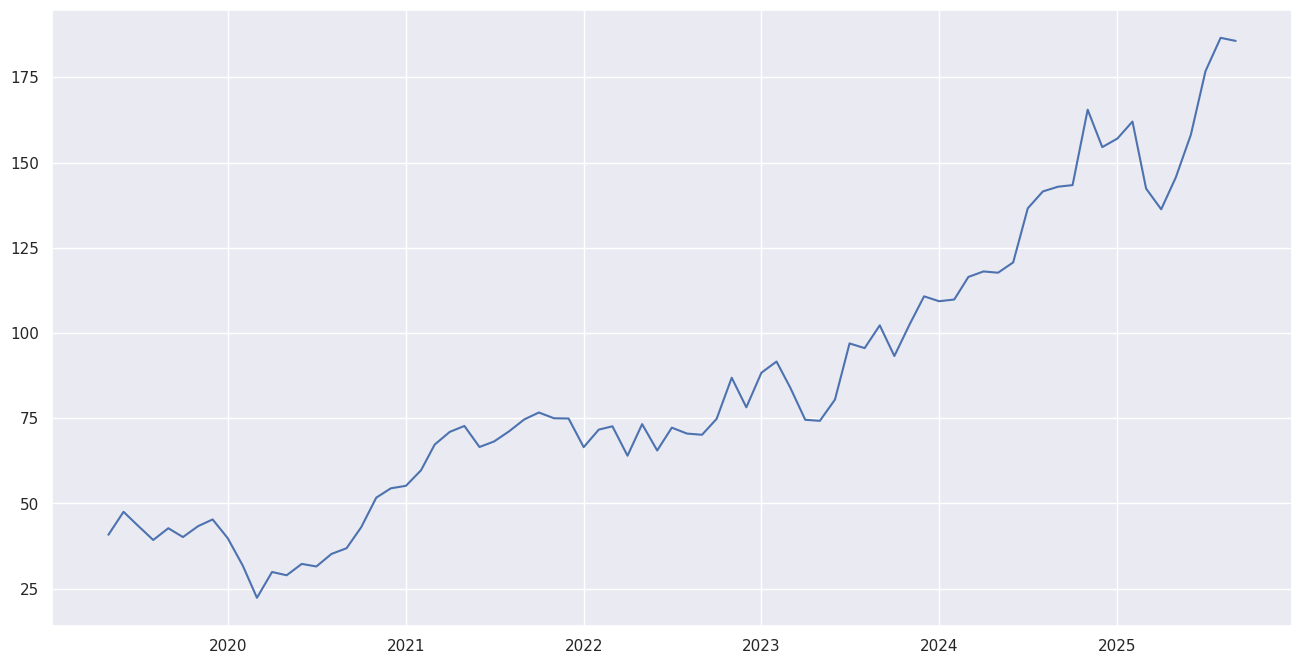

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "darkgrid")
plt.figure(figsize=(16,8))

x = df.Date.values
y = df.UBER.values

sns.lineplot(x=x, y=y)

Lyft and Uber

In [65]:
startdate = '2019-02-01'

print(startdate)

2019-02-01


In [66]:
ticker = ['LYFT','UBER','SPY']
df_close = pd.DataFrame()
for manigga in ticker:
  data = yf.download(manigga,interval= "1mo" ,start = startdate)
  df_close[manigga] = data['Close']

/tmp/ipython-input-3331609589.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(manigga,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3331609589.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(manigga,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3331609589.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(manigga,interval= "1mo" ,start = startdate)
[*********************100%***********************]  1 of 1 completed


In [67]:
df_close['Date'] = pd.to_datetime(df_close.index)
df = df_close.reset_index(drop=True)
df

,LYFT,UBER,SPY,Date
0,78.290001,NaN,255.500961,2019-03-01
1,59.799999,NaN,267.110199,2019-04-01
2,57.619999,40.410000,250.076263,2019-05-01
3,65.709999,46.380001,266.183441,2019-06-01
4,60.869999,42.139999,271.522247,2019-07-01
...,...,...,...,...
74,15.240000,84.160004,587.652771,2025-05-01
75,15.760000,93.300003,616.028809,2025-06-01
76,14.060000,87.750000,632.080017,2025-07-01
77,16.219999,93.750000,645.049988,2025-08-01


<Axes: >

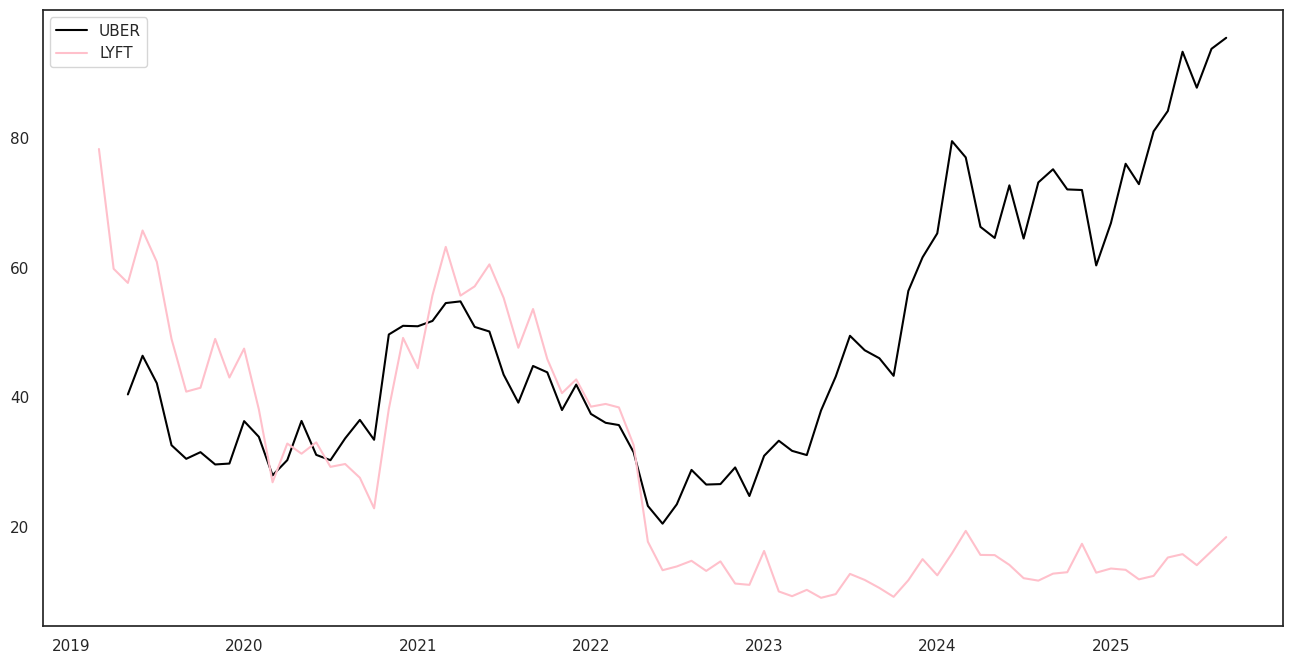

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "white")
plt.figure(figsize=(16,8))

x = df.Date.values
y1 = df.UBER.values
y2 = df.LYFT.values
y3 = df.SPY.values

sns.lineplot(x=x, y=y1, label = 'UBER', color = 'black')
sns.lineplot(x=x, y=y2, label = 'LYFT', color = 'pink')

Uber has outperformed Lyft in 2023 and their superior performance persists even for the following years.

Has Uber won the US market? or maybe another plausible reason might exist?

To assess the claim its useful to see how the US market had performed during the same period that's why we kept track also of the S&P 500 performance during that period as a reliable indicator of the status of the US companies.

<Axes: >

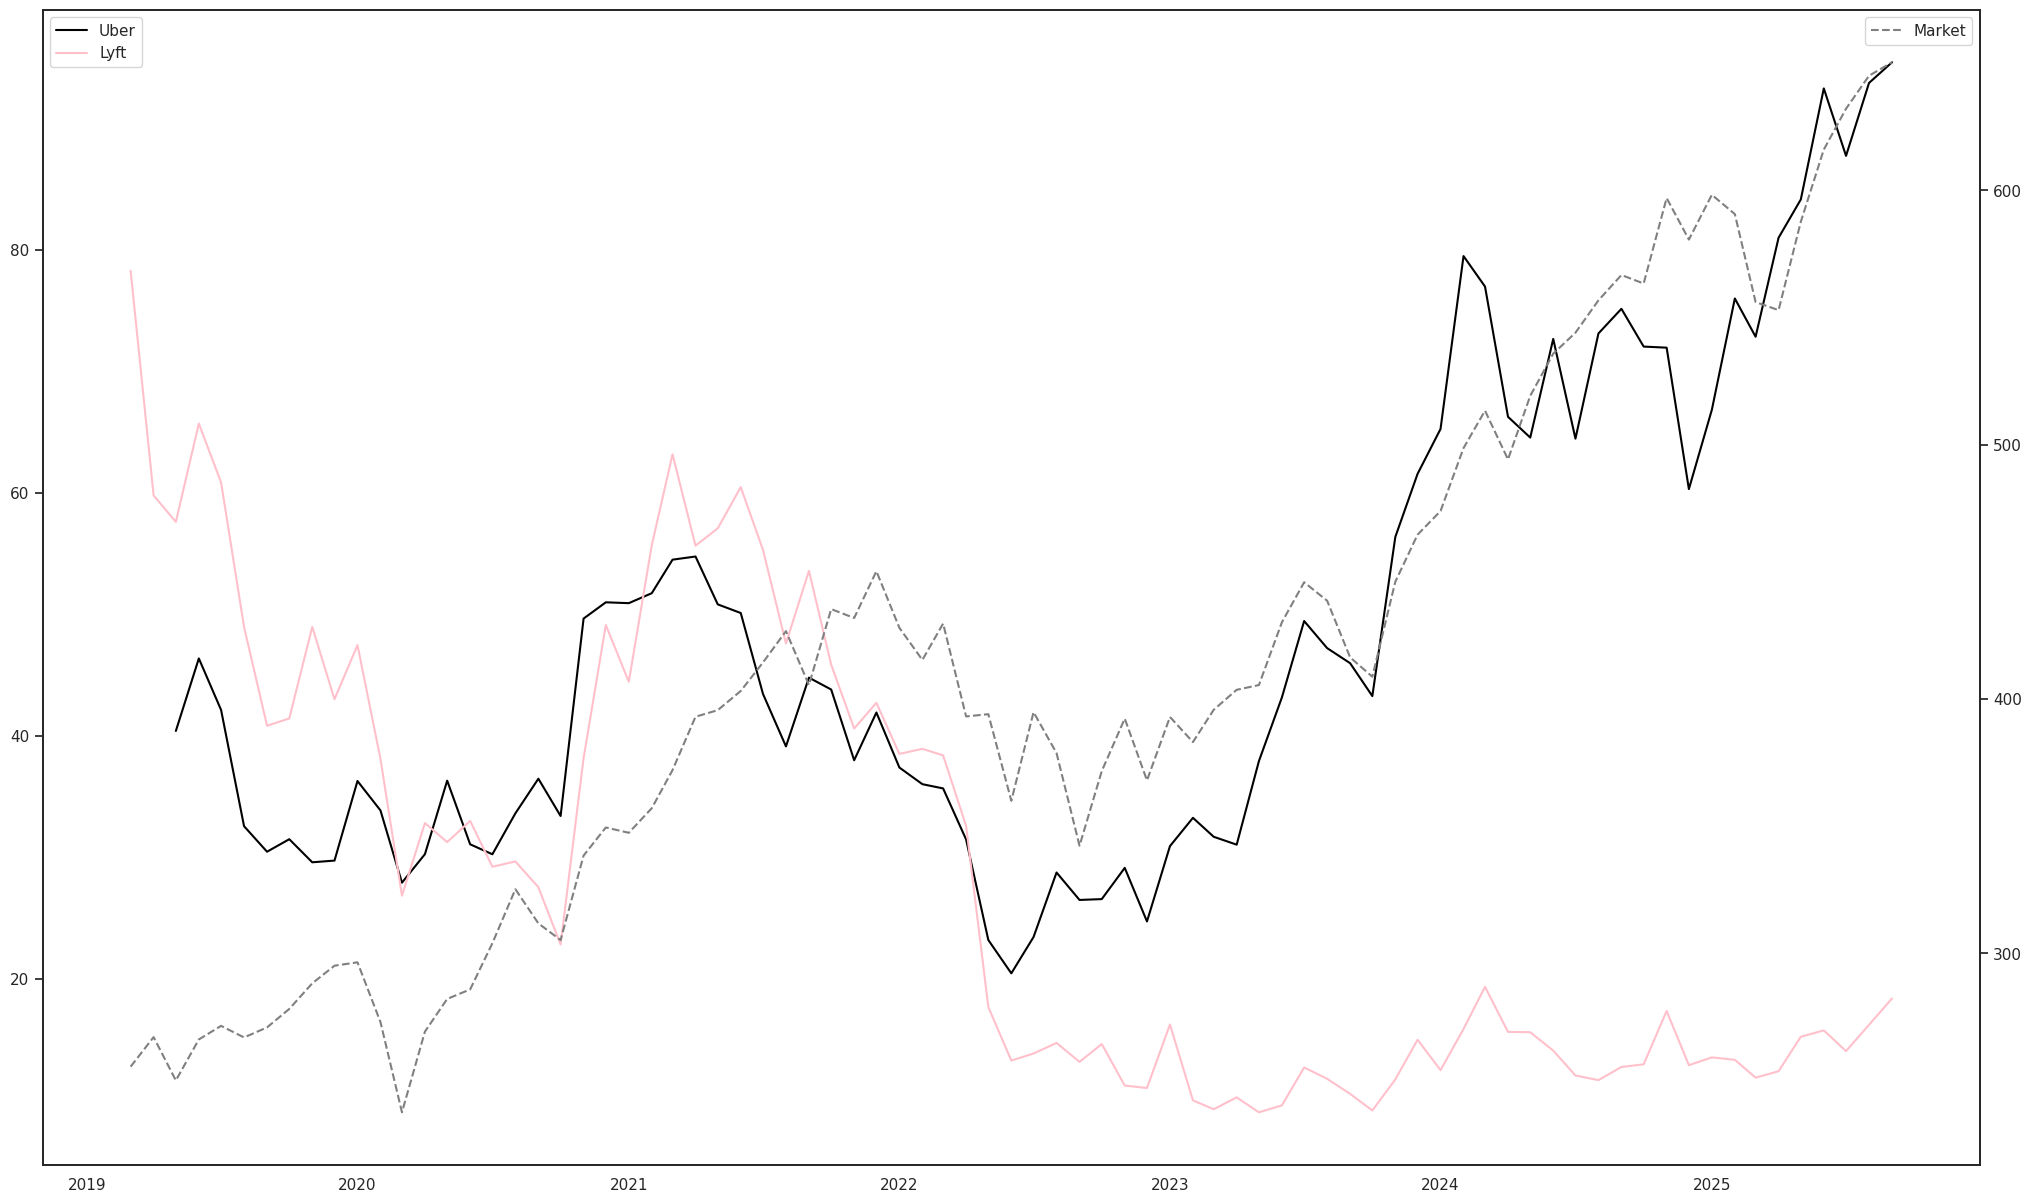

In [69]:
fig, ax1 = plt.subplots(figsize=(25,15))
# First y-axis (sales)
sns.lineplot(x=x, y=y1, ax=ax1, color='black', label="Uber")
sns.lineplot(x=x, y=y2, ax=ax1, color='pink', label="Lyft")

# Second y-axis (growth)
ax2 = ax1.twinx()
sns.lineplot(x=x, y=y3, ax=ax2, color="gray", label="Market",linestyle = "--")



The S&P 500 prices are plotted on the same graph as the two companies. The market index follows the secondary axis since the prices are significantly higher than any of the two companies.

It's clear that Uber follows the same trajectory as the market index.


This reflects Uber ability to scale and being percieved as having a strong growth potential probably because of Uber international presence unlike Lyft who stayed only in the US market.